**1. INTRODUCTION: MILESTONES 2**


Nama : Tazqia Ranyanisha
Batch : CODA-RMT-008 



Program ini dibuat Program ini dibuat untuk menganalisis efektivitas campaign marketing digital berdasarkan data pelanggan, channel, dan performa iklan, sehingga bisa memberikan insight untuk meningkatkan strategi pemasaran dan konversi.

Source data: https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset?utm

Link tableau: https://public.tableau.com/app/profile/tazqia.ranyanisha/viz/P1M1_TazqiaRanyanisha_CampaignDashboard/Story1


**2.  IDENTIFIKASI PERMASALAHAN**

**2.1 Latar Belakang**
Perusahaan e-commerce ShopEZ menjual berbagai produk dan ingin meningkatkan penjualan selama bulan Juli - Desember 2025. Untuk mencapai tujuan ini, perusahaan menjalankan berbagai kampanye digital marketing melalui beberapa saluran: Social Media, Email Marketing, PPC, Affiliate/Influencer Program, dan SEO.

**Setiap kampanye memiliki atribut penting:**
1. Waktu klik campaign: ClickTimestamp
2. Jenis kampanye: CampaignType (Awareness, Engagement, Conversion)
3. Anggaran iklan: AdSpend
4. Performa kampanye: CTR, Conversion Rate, WebsiteVisits, PagesPerVisit, TimeOnSite
5. Respons pelanggan: SocialShares, EmailOpens, EmailClicks
6. Data pelanggan: Age, Gender, Income, PreviousPurchases, LoyaltyPoints

**Permasalahan:** Perusahaan ingin mengetahui saluran pemasaran mana yang paling efektif untuk meningkatkan konversi dan bagaimana menyesuaikan strategi kampanye dengan segmen pelanggan yang berbeda. Setelah mengetahui insight ini, perusahaan ingin mengaplikasikan strategi yang paling optimal pada Q3–Q4 2025 untuk memaksimalkan penjualan. Dengan budget yang meningkat, diminta untuk merealisasikan kampanye digital tersebut.

**2.2 SMART Goal**
1. Specific: Mengidentifikasi saluran kampanye dan segmen pelanggan yang memberikan Conversion Rate tertinggi, sehingga ShopEZ dapat menyesuaikan alokasi anggaran dan strategi kampanye digital secara tepat.
2. Measurable: Target peningkatan Conversion Rate minimal 5% dibanding setahun sebelumnya
(Source: Shopify Blog, di mana 5% dianggap rata-rata yang realistis).
3. Achievable: Berdasarkan data historis pelanggan dan performa kampanye selama setahun sebelumnya, analisis dapat menentukan saluran dan platform yang paling efektif, serta budget marketing yang tersedia memadai untuk realisasi kampanye.
4. Relevant: Strategi ini mendukung tujuan utama perusahaan untuk meningkatkan penjualan dan profitabilitas, sekaligus mengoptimalkan penggunaan anggaran marketing.
5. Time-bound: Implementasi strategi di Q3–Q4 2025, dengan evaluasi hasil di akhir Desember 2025.

**2.3 Analisis 5W + 1H**
1. What – Apa saluran kampanye (CampaignChannel) yang memberikan Conversion Rate tertinggi?
2. Who – Segmen pelanggan mana (berdasarkan Age, Gender, Income) yang paling responsif terhadap kampanye tertentu?
3. When – Kapan periode kampanye paling efektif? Apakah di bulan tertentu (CampaignMonth) atau durasi kampanye tertentu?
4. Which – Platform dan tool iklan mana yang paling efektif meningkatkan engagement dan conversion?
5. How – Bagaimana cara mengoptimalkan anggaran (AdSpend) dan strategi kampanye untuk meningkatkan Conversion Rate?
6. Predictive – Bagaimana memprediksi tingkat konversi (ConversionRate) berdasarkan variabel utama seperti AdSpend, ClickThroughRate, CampaignChannel?

**2.4 Dataset description**

**Dataset Description:** Dataset ini berisi informasi kampanye digital marketing ShopEZ dari Januari–Juni 2025, meliputi data pelanggan, performa kampanye, interaksi, dan hasil konversi.

**Columns:**
* `CustomerID`: ID unik pelanggan
* `Age`: umur pelanggan
* `Gender`: jenis kelamin pelanggan
* `Income`: penghasilan pelanggan
* `CampaignChannel`: saluran kampanye (Social Media, Email, PPC, Referral, SEO)
* `CampaignType`: kategori yang menunjukkan tujuan utama kampanye digital, misalnya Awareness (mengenalkan brand), Engagement (meningkatkan interaksi), atau Conversion (mendorong pembelian).
* `ClickTimestamp`: tanggal dimana user klik campaign
* `AdSpend`: anggaran iklan per kampanye (in USD)
* `IncomeGroup`: grup gaji pelanggan (in USD)
* `ClickThroughRate`: rasio klik iklan
* `ConversionRate`: rasio konversi kampanye
* `WebsiteVisits`: jumlah kunjungan website
* `PagesPerVisit`: halaman rata-rata yang dikunjungi
* `TimeOnSite`: durasi rata-rata kunjungan
* `SocialShares`: jumlah share sosial media
* `EmailOpens` / `EmailClicks`: interaksi email
* `PreviousPurchases`: jumlah pembelian sebelumnya
* `LoyaltyPoints`: poin loyalitas pelanggan
* `AdvertisingPlatform` / `AdvertisingTool`: platform & tools iklan yang digunakan
* `Conversion`: indikator apakah kampanye menghasilkan konversi (1 = ya, 0 = tidak)


**3. DATA LOADING**

In [1]:
#Import dataset
import pandas as pd
df = pd.read_csv("digital_marketing_campaign_dataset.csv")

In [2]:
df.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


**4. DATA CLEANING**

In [3]:
#Dikarenakan masih ada data yang kurang seperti ClickTimestamp, 
# #Saya akan menginput data Clicktimestamp terlebih dahulu
import pandas as pd
import numpy as np

# Contoh jika df sudah ada
n = len(df)

# Rentang waktu
start_date = pd.to_datetime('2024-06-01')
end_date = pd.to_datetime('2025-06-30')

# Generate random timestamp (dalam detik)
random_seconds = np.random.randint(
    0, int((end_date - start_date).total_seconds()), size=n
)

# Buat kolom waktu klik campaign
df['ClickTimestamp'] = start_date + pd.to_timedelta(random_seconds, unit='s')

# Cek hasil
print(df['ClickTimestamp'].head())


0   2024-12-28 23:16:37
1   2025-04-10 04:42:42
2   2025-02-23 12:04:23
3   2024-09-19 08:54:02
4   2025-03-11 02:37:25
Name: ClickTimestamp, dtype: datetime64[ns]


In [4]:
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,ClickTimestamp
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,...,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1,2024-12-28 23:16:37
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,...,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1,2025-04-10 04:42:42
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,...,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1,2025-02-23 12:04:23
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,...,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1,2024-09-19 08:54:02
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,...,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1,2025-03-11 02:37:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,...,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0,2025-06-09 13:07:48
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,...,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0,2024-06-17 16:27:14
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,...,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1,2024-10-14 06:35:49
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,...,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1,2024-07-09 19:52:28


In [5]:
#Karena AdvertisingPlatform & AdvertisingToolnya confidential, saya akan membuat data dummy.
#Cek data CampaignChannel terlebih dahulu
print(df['CampaignChannel'].unique())

['Social Media' 'Email' 'PPC' 'Referral' 'SEO']


In [6]:
import random
import pandas as pd

#1. Dictionary mapping (Strict Mapping) 
ads_mapping = {
    'Social Media': [
        ('Facebook', 'Facebook Ads Manager'),
        ('Instagram', 'Meta Ads Manager'),
        ('TikTok', 'TikTok Ads Manager'),
        ('Twitter (X)', 'X Ads Manager'),
        ('LinkedIn', 'LinkedIn Campaign Manager')
    ],
    'Email': [
        ('Mailchimp', 'Mailchimp Automation'),
        ('Sendinblue', 'Sendinblue Dashboard')
    ],
    'PPC': [
        ('Google Ads', 'Google Ads Manager'),
        ('Bing Ads', 'Microsoft Advertising Platform'),
        ('Amazon Ads', 'Amazon Advertising Console')
    ],
    'Referral': [
        ('CJ Affiliate', 'CJ Affiliate Dashboard'),
        ('Upfluence', 'Upfluence Platform'),
        ('Yotpo', 'Yotpo Loyalty Manager')
    ],
    'SEO': [
        ('Google Search', 'Google Search Console'),
        ('Bing', 'Bing Webmaster Tools'),
        ('Yahoo', 'Yahoo Search Marketing')
    ]
}

#  2. Fungsi untuk assign platform & tool
def assign_ads_info(channel):
    platform, tool = random.choice(ads_mapping[channel])
    return pd.Series([platform, tool])

#  3. Memastikan df adalah copy, lalu apply 
df = df.copy()  
df[['AdvertisingPlatform', 'AdvertisingTool']] = df['CampaignChannel'].apply(assign_ads_info)

#  4. Cek hasil 
print(df[['CampaignChannel', 'AdvertisingPlatform', 'AdvertisingTool']].head())


  CampaignChannel AdvertisingPlatform                 AdvertisingTool
0    Social Media         Twitter (X)                   X Ads Manager
1           Email          Sendinblue            Sendinblue Dashboard
2             PPC            Bing Ads  Microsoft Advertising Platform
3             PPC          Google Ads              Google Ads Manager
4             PPC          Amazon Ads      Amazon Advertising Console


In [7]:
#Memastikan tidak ada data yang null
df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
ClickTimestamp         0
dtype: int64

In [8]:
#Menambah data user perregion
import numpy as np

# Daftar pulau/region besar di Indonesia
pulau_indonesia = [
    "Jawa", "Sumatra", "Kalimantan", "Sulawesi", "Papua", "Bali", "Nusa Tenggara"
]

# Tambahkan kolom baru berisi random pulau
df['Region'] = np.random.choice(pulau_indonesia, size=len(df))


In [9]:
#Rapikan tipe data
df.dtypes

CustomerID                      int64
Age                             int64
Gender                         object
Income                          int64
CampaignChannel                object
CampaignType                   object
AdSpend                       float64
ClickThroughRate              float64
ConversionRate                float64
WebsiteVisits                   int64
PagesPerVisit                 float64
TimeOnSite                    float64
SocialShares                    int64
EmailOpens                      int64
EmailClicks                     int64
PreviousPurchases               int64
LoyaltyPoints                   int64
AdvertisingPlatform            object
AdvertisingTool                object
Conversion                      int64
ClickTimestamp         datetime64[ns]
Region                         object
dtype: object

In [10]:
#Setelah data bersih save ulang ke CSV
df.to_csv('marketing_campaign.csv', index=False)

**5. ANALISIS STATISTIK DESKRIPTIF**

Pertanyaan: pilihlah minimal salah satu perhitungan/analisis statistik deskriptif seperti central tendency, measure of variance, outlier analysis, distribution, dsb. Sesuaikan dengan penjabaran masalah yang ditentukan.

Perhitungan: Central Tendency + Variance untuk AdSpend dan ConversionRate
→ karena ini langsung menjawab “berapa rata-rata pengeluaran & performa kampanye” dan “seberapa besar variasinya”.

In [11]:
# Kolom yang akan dianalisis
cols = ['AdSpend', 'ConversionRate']

# Central Tendency
mean_values = df[cols].mean()
median_values = df[cols].median()
mode_values = df[cols].mode().iloc[0] 

# Measure of Variance
variance_values = df[cols].var()
std_values = df[cols].std()
range_values = df[cols].max() - df[cols].min()

# Gabungkan ke dalam satu DataFrame 
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Variance': variance_values,
    'Std Dev': std_values,
    'Range': range_values
})



In [12]:
summary_stats

,Mean,Median,Mode,Variance,Std Dev,Range
AdSpend,5000.944830,5013.440044,100.054813,8.054461e+06,2838.038153,9897.859968
ConversionRate,0.104389,0.104046,0.010018,3.011628e-03,0.054878,0.189977


**Hasil Analisis AdSpend (Pengeluaran Iklan)**
1. Rata-rata (Mean): Sekitar 5.000 USD dikeluarkan untuk setiap kampanye.
2. Median: 5.013 USD, hampir sama dengan rata-rata. Artinya sebagian besar kampanye berada di sekitar angka ini, tidak condong terlalu besar atau terlalu kecil.
3. Modus: 100 USD, jauh lebih kecil dari rata-rata --> setelah uji coba modus di code bawah, ternyata seluruh nilai Adspend itu unik, yang artinya mode tidak relevan untuk data kontinu dengan nilai unik seperti AdSpend ini.
4. Variansi & Standar Deviasi: Angkanya besar (variasi tinggi), menunjukkan ada kampanye dengan pengeluaran sangat besar dan sangat kecil.
5. Range (Selisih terbesar-terkecil): Hampir 9.898 USD, jadi memang ada perbedaan besar antara kampanye paling hemat dan paling mahal.

**Artinya: Pengeluaran iklan sangat bervariasi.**

In [13]:
adspend_min = df['AdSpend'].min()
adspend_max = df['AdSpend'].max()
print(f"Min AdSpend: {adspend_min}")
print(f"Max AdSpend: {adspend_max}")


Min AdSpend: 100.05481308980612
Max AdSpend: 9997.914780944691


**Hasil Analisis Conversion Rate (CR):**
1. Mean: sekitar 0.1044 (10,44%) → Secara umum, konversi kampanye berada di sekitar 10,4%.
2. Median: 0.1040, mendekati mean → distribusi CR relatif seimbang, tidak ada kemiringan ekstrem.
3. Modus: 0.0100, tapi karena semua data unik atau hampir unik, modus tidak berarti (hanya kebetulan nilai terkecil ini muncul paling awal).
4. Variance: 0.0030 dan Std Dev: 0.0549 → variasi nilai cukup besar dibandingkan nilai rata-rata (lebih dari 50% dari mean).
5. Range: 0.1899 → ada gap besar antara CR terendah dan tertinggi.

**Artinya:**
Sebagian besar kampanye punya conversion rate di sekitar 10%, tapi ada cukup banyak kampanye berkinerja rendah (1%) yang sering muncul. Variasi tinggi ini menandakan bahwa efektivitas kampanye berbeda-beda, mungkin karena perbedaan channel, strategi, atau target audiens.

In [14]:
df['ConversionRate'].nunique() == len(df['ConversionRate'])

True

In [15]:
ConversionRate_min = df['ConversionRate'].min()
ConversionRate_max = df['ConversionRate'].max()
print(f"Min CR: {ConversionRate_min}")
print(f"Max CR: {ConversionRate_max}")


Min CR: 0.0100177828330717
Max CR: 0.1999947079999166


**6. ANALISIS STATISTIK INFERENSIAL** 

PERTANYAAN:  Pilihlah minimal salah satu perhitungan/analisis statistik inferensial seperti confidence interval, statistical significance, statistical testing, hypothesis testing: one sample, two sample independent, paired test, ANOVA, chi-square, dsb. Sesuaikan dengan penjabaran masalah yang ditentukan.

**6.i Menentukan hipotesis:**
- H₀ (Hipotesis Nol): Rata-rata Conversion Rate semua channel sama (channel tidak memengaruhi CR).
- H₁ (Hipotesis Alternatif): Ada perbedaan rata-rata Conversion Rate antar channel (setidaknya satu berbeda).

**6.ii Pilih metode pengujian**
Karena kita membandingkan lebih dari dua kelompok (channel), pakai ANOVA (Analysis of Variance).

In [16]:
#Cek kategori campaign channel
df['CampaignChannel'].unique()

array(['Social Media', 'Email', 'PPC', 'Referral', 'SEO'], dtype=object)

In [17]:
#Pisahkan data ConversionRate 
email = df['ConversionRate'][df['CampaignChannel']=='Email']
ppc = df['ConversionRate'][df['CampaignChannel']=='PPC']
seo = df['ConversionRate'][df['CampaignChannel']=='SEO']
referral = df['ConversionRate'][df['CampaignChannel']=='Referral']
socialmedia = df['ConversionRate'][df['CampaignChannel']=='Social Media']

In [18]:
#Hitung rata-rata masing-masing channel
print(f'Average ConversionRate Social Media: {socialmedia.mean():.4f}')
print(f'Average ConversionRate Email: {email.mean():.4f}')
print(f'Average ConversionRate PPC: {ppc.mean():.4f}')
print(f'Average ConversionRate Referral: {referral.mean():.4f}')
print(f'Average ConversionRate SEO: {seo.mean():.4f}')



Average ConversionRate Social Media: 0.1066
Average ConversionRate Email: 0.1049
Average ConversionRate PPC: 0.1041
Average ConversionRate Referral: 0.1031
Average ConversionRate SEO: 0.1035


In [19]:
#Tentukan hipotesis
# Recall Hipotesis
# H0: Rata-rata Conversion Rate semua channel hampir sama sama, tidak ada perbedaan signifikan antara Social Media, Email, PPC, Referral, dan SEO.
# H1: Rata-rata Conversion Rate setidaknya satu channel berbeda, ada minimal satu channel yang performanya berbeda secara signifikan dibanding yang lain.

#Lakukan ANOVA
from scipy import stats

res = stats.f_oneway(socialmedia, email, ppc, referral, seo)
print('P-value:', res.pvalue)

P-value: 0.4170397703480838


**Interpretasi:**

Dengan p-value = 0.417:
- Nilai ini lebih besar dari 0,05 (α = 5%), artinya tidak ada bukti cukup untuk menolak H₀.
- Kesimpulannya: rata-rata ConversionRate antar channel (Social Media, Email, PPC, Referral, SEO) tidak berbeda secara signifikan.
- Dengan kata lain, walaupun ada perbedaan angka kecil, perbedaan itu bisa saja karena variasi acak, bukan karena perbedaan nyata di performa channel.

**7. ANALISIS TAMBAHAN**

**1. What – Saluran Kampanye Terbaik**

In [20]:
# Rata-rata ConversionRate per CampaignChannel
# Mean digunakan untuk mengetahui rata-rata AdSpend dan ConversionRate tiap kampanye, karena ini memberi gambaran pengeluaran iklan rata-rata.
channel_cr = df.groupby('CampaignChannel')['ConversionRate'].mean().sort_values(ascending=False)
print(channel_cr)


CampaignChannel
Social Media    0.106550
Email           0.104884
PPC             0.104132
SEO             0.103530
Referral        0.103051
Name: ConversionRate, dtype: float64


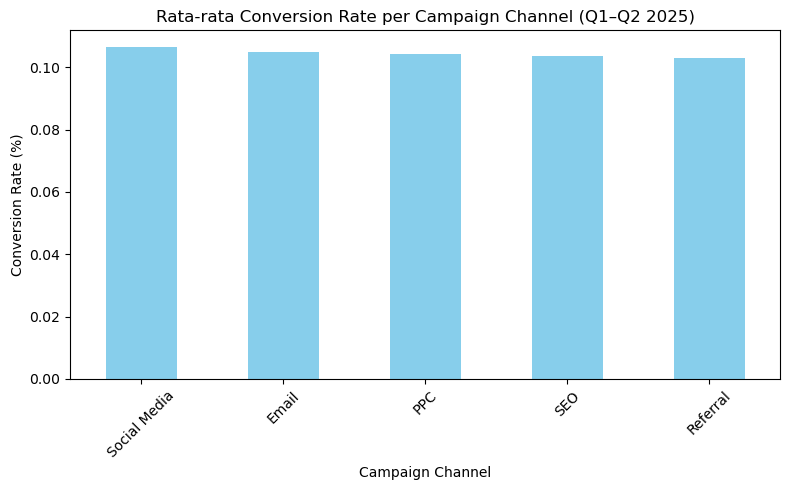

In [21]:
import matplotlib.pyplot as plt

# Data
channel_cr = df.groupby('CampaignChannel')['ConversionRate'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
channel_cr.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Conversion Rate per Campaign Channel (Q1–Q2 2025)')
plt.xlabel('Campaign Channel')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Result:** Social Media adalah campaign channel terbaik dan bisa dioptimalisasi penggunaannya oleh tim marketing dengan rata rata tertinggi yaitu 0.106.

2. **What** - Apakah rata-rata Conversion Rate berbeda signifikan antar kategori CampaignType?

In [22]:
import pandas as pd
from scipy.stats import f_oneway

# Ambil data tiap kategori
awareness = df[df['CampaignType'] == 'Awareness']['ConversionRate']
retention = df[df['CampaignType'] == 'Retention']['ConversionRate']
conversion = df[df['CampaignType'] == 'Conversion']['ConversionRate']
consideration = df[df['CampaignType'] == 'Consideration']['ConversionRate']

# One-Way ANOVA
f_stat, p_val = f_oneway(awareness, retention, conversion, consideration)

print("F-Statistic:", f_stat)
print("p-value:", p_val)


F-Statistic: 0.45210658040416407
p-value: 0.7158119183678934


**Result**: Hasil ANOVA menunjukkan **F = 0.45** dan **p-value = 0.716**, artinya **tidak ada perbedaan signifikan** pada rata-rata Conversion Rate antar kategori CampaignType. Dengan kata lain, jenis kampanye (Awareness, Retention, Conversion, Consideration) **tidak memengaruhi secara signifikan Conversion Rate**.


3. **What** - Apakah pelanggan dengan LoyaltyPoints tinggi lebih cenderung melakukan konversi dibanding pelanggan biasa?

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind


# Buat kategori HighLP (>= Q3)
threshold = df['LoyaltyPoints'].quantile(0.75)
df['HighLP'] = np.where(df['LoyaltyPoints'] >= threshold, 1, 0)

# Ambil dua kelompok
high_group = df[df['HighLP'] == 1]['Conversion']
low_group = df[df['HighLP'] == 0]['Conversion']

# Uji T-Test 
t_stat, p_val = ttest_ind(high_group, low_group, equal_var=False)

# Hitung mean per grup
mean_high, mean_low = high_group.mean(), low_group.mean()

print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
print(f"Mean High LP: {mean_high:.4f}, Mean Low LP: {mean_low:.4f}")

if p_val < 0.05:
    print("Hasil signifikan: Pelanggan dengan LoyaltyPoints tinggi berbeda dalam Conversion Rate.")
else:
    print("Tidak ada bukti signifikan perbedaan Conversion Rate antara kelompok.")

T-statistic: 4.5437, p-value: 0.0000
Mean High LP: 0.9035, Mean Low LP: 0.8675
Hasil signifikan: Pelanggan dengan LoyaltyPoints tinggi berbeda dalam Conversion Rate.


**Result**: Result: T-statistic 4.54 menunjukkan perbedaan yang kuat antara dua kelompok (LoyaltyPoints tinggi vs biasa). Pelanggan dengan poin tinggi jelas lebih sering melakukan konversi, ditunjukkan oleh Conversion Rate yang lebih tinggi (0,9035) dibandingkan pelanggan biasa (0,8675). Dengan ini,  tim marketing bisa menargetkan customer loyal sebagai target ads tertentu.

3. **What**: Faktor apa yang paling berpengaruh ke Conversion Rate?

In [24]:
#Hitung faktor satu persatu, dimulai dari Channel
import scipy.stats as stats

groups = [df['ConversionRate'][df['CampaignChannel'] == ch] for ch in df['CampaignChannel'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA CampaignChannel vs ConversionRate -> F-Statistic:", f_stat, ", p-value:", p_val)


ANOVA CampaignChannel vs ConversionRate -> F-Statistic: 0.9799386185702154 , p-value: 0.4170397703480838


In [25]:
#Campaign type
groups = [df['ConversionRate'][df['CampaignType'] == ct] for ct in df['CampaignType'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA CampaignType vs ConversionRate -> F-Statistic:", f_stat, ", p-value:", p_val)


ANOVA CampaignType vs ConversionRate -> F-Statistic: 0.45210658040416407 , p-value: 0.7158119183678934


In [26]:
#AdSpend, karena adspend berbentuk numerik, jadi memakai uji korelasi
corr, p_val = stats.pearsonr(df['AdSpend'], df['ConversionRate'])
print("Correlation AdSpend vs ConversionRate -> r:", corr, ", p-value:", p_val)


Correlation AdSpend vs ConversionRate -> r: -0.020184847133302375 , p-value: 0.0710294066692255


In [27]:
#Region
import scipy.stats as stats
groups = [df[df['Region'] == region]['ConversionRate'] for region in df['Region'].unique()]

f_stat, p_val = stats.f_oneway(*groups)

print(f"F-Statistic: {f_stat}, p-value: {p_val}")


F-Statistic: 0.278362264866546, p-value: 0.9473822044444824


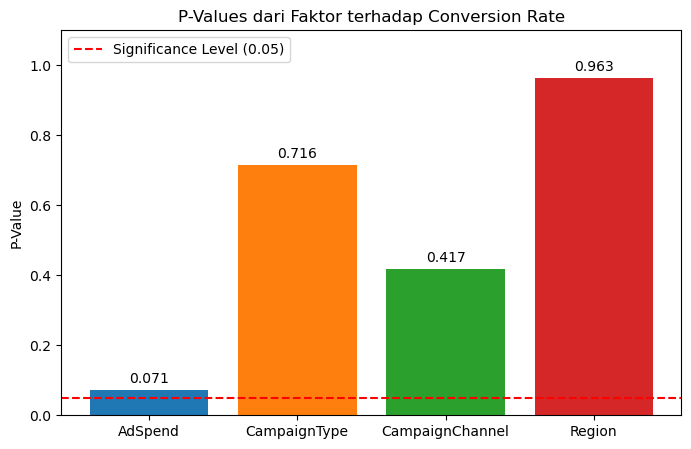

In [28]:
#Visualisasi signifikansi faktor terhadap CR
import matplotlib.pyplot as plt

# Data p-value
factors = ['AdSpend', 'CampaignType', 'CampaignChannel', 'Region']
p_values = [0.0710294066692255, 0.7158119183678934, 0.4170397703480838, 0.9626748713159748]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(factors, p_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Garis signifikansi 0.05
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')

# Tambahkan nilai p-value di atas bar
for bar, p in zip(bars, p_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{p:.3f}', ha='center', fontsize=10)

# Label & Title
plt.title('P-Values dari Faktor terhadap Conversion Rate')
plt.ylabel('P-Value')
plt.ylim(0, 1.1)
plt.legend()
plt.show()


**Result**: 
**AdSpend (0.071) < CampaignChannel (0.417) < CampaignType (0.716) < Region (0.963)**

Tidak ada faktor yang menunjukkan pengaruh signifikan terhadap Conversion Rate pada tingkat signifikansi 5%. Namun, jika dilihat dari p-value, AdSpend memiliki pengaruh relatif lebih besar (p = 0.071) dibandingkan faktor lainnya, meskipun tetap tidak signifikan. Faktor CampaignChannel (p = 0.417), CampaignType (p = 0.716), dan Region (p = 0.963) menunjukkan pengaruh yang sangat kecil terhadap variasi Conversion Rate.

**4. Who – Segmen Pelanggan Paling Responsif terhadap Campaign**

In [29]:
# Grouping Age & Income
#Grouping dilakukan untuk menganalisis performa kampanye per CampaignChannel dan segmen pelanggan (Age, Gender, Income), setelah itu kita bisa lihat channel mana dan segmen mana yang paling responsif terhadap kampanye dengan menghitung avg CR masing-masing segmen.
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,24,34,44,54,64,100], labels=['18-24','25-34','35-44','45-54','55-64','65+'])
df['IncomeGroup'] = pd.cut(df['Income'], bins=[0,5000,10000,20000,50000,100000,500000], labels=['<5k','5-10k','10-20k','20-50k','50-100k','>100k'])

# Hitung average CR per segment
seg_cr = df.groupby(['AgeGroup','Gender','IncomeGroup'])['ConversionRate'].mean().sort_values(ascending=False)
print(seg_cr.head(3))


AgeGroup  Gender  IncomeGroup
35-44     Female  20-50k         0.112519
55-64     Male    >100k          0.111385
18-24     Male    50-100k        0.111062
Name: ConversionRate, dtype: float64


/var/folders/23/qf75gzqs54g76t973jhch6yc0000gn/T/ipykernel_81270/3430635930.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seg_cr = df.groupby(['AgeGroup','Gender','IncomeGroup'])['ConversionRate'].mean().sort_values(ascending=False)


**Result:** Perempuan 35-44 tahun dengan gaji 20-50k adalah segmen paling responsif terhadap Campaign sehingga tim marketing bisa menargetkan segmen tsb ketika membuat campaign.

Selanjutnya berikut breakdown segmen paling responsif di setiap channel:

In [30]:
# Grouping by Channel, AgeGroup, Gender, IncomeGroup
channel_seg_cr = (
    df.groupby(['CampaignChannel','AgeGroup','Gender','IncomeGroup'])['ConversionRate']
    .mean()
    .reset_index()
)

# Ambil segmen dengan ConversionRate tertinggi per channel
top_segments_per_channel = (
    channel_seg_cr.loc[channel_seg_cr.groupby('CampaignChannel')['ConversionRate'].idxmax()]
    .sort_values(by='ConversionRate', ascending=False)
)

print(top_segments_per_channel)


    CampaignChannel AgeGroup  Gender IncomeGroup  ConversionRate
213        Referral      65+    Male      20-50k        0.134358
59            Email    55-64    Male       >100k        0.128331
299    Social Media    18-24    Male       >100k        0.126627
274             SEO    55-64    Male     50-100k        0.122474
99              PPC    35-44  Female      20-50k        0.119160


/var/folders/23/qf75gzqs54g76t973jhch6yc0000gn/T/ipykernel_81270/2759851899.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['CampaignChannel','AgeGroup','Gender','IncomeGroup'])['ConversionRate']


Dengan ini, tim marketing bisa menargetkan segmen tertentu saat melakukan campaign.

In [31]:
# Simpan ke CSV
df.to_csv('marketing_campaign_clean.csv', index=False)

**5. When – Periode Kampanye Paling Efektif/ Bagaimana trend campaign 1 tahun ke belakang**

In [32]:
# Pastikan kolom ClickTimestamp dalam format datetime
df['ClickTimestamp'] = pd.to_datetime(df['ClickTimestamp'])

# Buat kolom bulan (format: 2025-07)
df['Month'] = df['ClickTimestamp'].dt.to_period('M')

# Hitung rata-rata ConversionRate per bulan
avg_conversion_per_month = df.groupby('Month')['ConversionRate'].mean().reset_index()

# Lihat hasil
print(avg_conversion_per_month)



      Month  ConversionRate
0   2024-06        0.105444
1   2024-07        0.096895
2   2024-08        0.104028
3   2024-09        0.103933
4   2024-10        0.105697
5   2024-11        0.101339
6   2024-12        0.103366
7   2025-01        0.104281
8   2025-02        0.104868
9   2025-03        0.106799
10  2025-04        0.107639
11  2025-05        0.106066
12  2025-06        0.106578


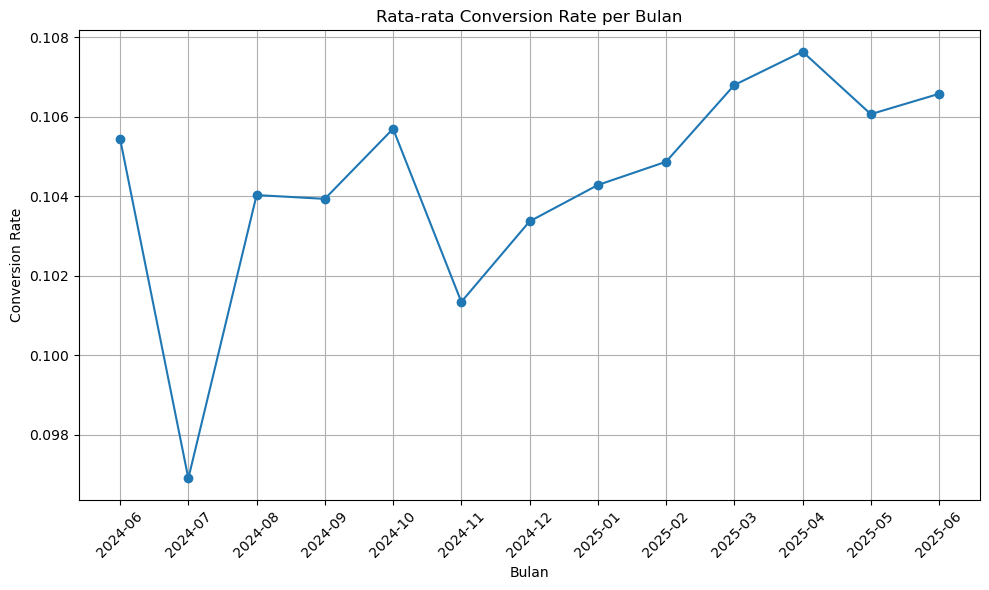

In [33]:
import matplotlib.pyplot as plt


avg_conversion_per_month['MonthStr'] = avg_conversion_per_month['Month'].astype(str)

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(avg_conversion_per_month['MonthStr'], avg_conversion_per_month['ConversionRate'], marker='o')
plt.title('Rata-rata Conversion Rate per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Result:** Bulan paling efektif untuk kampanye adalah Maret 2025. Meski begitu, performa kampanye cenderung fluktuatif antar bulan, yang artinya, ada faktor lain seperti saluran kampanye dan segmen pelanggan juga berpengaruh terhadap konversi.

**6. Which – Platform & Tool Iklan Paling Efektif**

In [34]:
# Avg CR per platform & tool
platform_cr = df.groupby(['AdvertisingPlatform','AdvertisingTool'])['ConversionRate'].mean().sort_values(ascending=False)
print(platform_cr.head(1))

AdvertisingPlatform  AdvertisingTool          
LinkedIn             LinkedIn Campaign Manager    0.109892
Name: ConversionRate, dtype: float64


**Result:** Ads Platform dan tools yang paling tinggi CRnya adalah Twitter, sehingga tim marketing bisa mengoptimalisasi penggunaan platform dan tools tsb. 

**KESIMPULAN UTAMA**

Analisis data ShopEZ menunjukkan bahwa pengeluaran iklan sangat bervariasi, dengan rata-rata sekitar 5.000 USD per kampanye. Meskipun rata-rata Conversion Rate cukup stabil di 10,4%, variasinya besar sehingga strategi pemasaran tidak bisa disamaratakan. Social Media menjadi channel dengan performa terbaik, sedangkan faktor jenis kampanye tidak signifikan memengaruhi konversi. Segmentasi pelanggan dan pemilihan platform memiliki dampak besar terhadap efektivitas kampanye, sehingga keduanya perlu menjadi fokus utama optimasi.

**Key Points Hasil Analisis**

1. Pengeluaran Iklan (AdSpend):
- Rata-rata pengeluaran iklan berada di kisaran 5.000 USD per kampanye, yang menunjukkan bahwa sebagian besar kampanye dijalankan dengan anggaran menengah.
- Variansi yang tinggi (hampir 9.898 USD antara minimum dan maksimum) menandakan adanya ketidakseimbangan pengalokasian budget, sehingga pengaturan ulang prioritas channel dan segmen sangat penting.
- Karena distribusi median mendekati mean, sebagian besar kampanye konsisten, namun beberapa outlier dengan biaya tinggi perlu dievaluasi dampak ROI-nya.

2. Conversion Rate (CR):
- Rata-rata CR sebesar 10,44% menunjukkan performa kampanye cukup baik, namun adanya variasi besar (range 0.1899) mengindikasikan bahwa efektivitas sangat bergantung pada channel dan segmen tertentu.
- Distribusi CR yang seimbang (median mendekati mean) menandakan tidak ada bias besar, tetapi strategi personalisasi dapat meningkatkan CR di segmen yang saat ini underperform.

3. Channel Performance:
Social Media menempati posisi teratas dengan CR rata-rata 10,6%, menjadikannya channel paling potensial untuk dialokasikan lebih banyak anggaran dan pengembangan konten kreatif yang engaging.

4. Hasil Uji Statistik:
- ANOVA menunjukkan tidak ada perbedaan signifikan antar jenis kampanye (p = 0.716), sehingga pemilihan tipe kampanye (Awareness, Retention, Conversion) tidak perlu menjadi prioritas utama.
- Uji T memperlihatkan bahwa pelanggan dengan Loyalty Points tinggi memiliki CR jauh lebih besar dibanding pelanggan biasa, sehingga strategi retargeting berbasis loyalitas akan memberikan dampak positif yang signifikan.

5. Faktor yang Mempengaruhi CR:
Tidak ada faktor yang signifikan, namun AdSpend (p=0.071) memiliki pengaruh relatif lebih besar daripada faktor lainnya. Hal ini menunjukkan bahwa pengelolaan budget tetap penting untuk menjaga efektivitas konversi.

6. Segmentasi Pelanggan Responsif:
- Secara umum, perempuan berusia 35–44 dengan pendapatan 20–50k adalah segmen paling responsif, sehingga mereka dapat dijadikan target prioritas dalam kampanye berbayar.
- Namun, setiap channel memiliki segmen unggulan yang berbeda, misalnya: Referral unggul di laki-laki usia 65+ berpenghasilan 20–50k (CR = 13,4%), sedangkan Social Media unggul di laki-laki 18–24 berpenghasilan >100k (CR = 12,6%). Strategi personalisasi per channel akan meningkatkan ROI kampanye.

7. Waktu & Platform:
- Maret 2025 adalah bulan dengan performa terbaik, sehingga bulan ini dapat dimanfaatkan untuk campaign besar seperti product launch atau promosi khusus.
- Twitter menjadi platform paling efektif dengan CR tertinggi, sehingga konten yang disesuaikan untuk Twitter Ads dapat memaksimalkan konversi.

**REKOMENDASI**

1. Channel Optimization
- Fokus pada Social Media sebagai channel utama karena memiliki rata-rata CR tertinggi (10,6%). 
- Pertahankan channel Referral & Email dengan pendekatan personalisasi karena channel ini menonjol pada segmen tertentu (misalnya Referral efektif untuk segmen senior high-income).

2. Budget Allocation
- Evaluasi pengeluaran campaign selanjutnya dengan ROI tracking, terutama pada kampanye yang menggunakan anggaran besar tetapi tidak menghasilkan konversi tinggi.
- Pertimbangkan shifting budget dari channel rendah performa (PPC) ke Social Media dan Referral, agar dana digunakan untuk saluran yang memberikan dampak konversi lebih besar.

3. Segmentation Strategy
- Targetkan segmen prioritas utama: perempuan usia 35–44 dengan pendapatan 20–50k, karena mereka menunjukkan respons tertinggi terhadap kampanye.
- Personalisasi berdasarkan channel: misalnya, gunakan Social Media untuk menjangkau laki-laki 18–24 dengan penghasilan >100k, dan gunakan Referral untuk pria 65+ dengan penghasilan menengah. Ini akan meningkatkan CR pada tiap channel.
- Gunakan program loyalitas untuk meningkatkan retensi, karena pelanggan dengan Loyalty Points tinggi terbukti memiliki CR jauh lebih besar (90% vs 86%).

4. Timing & Seasonality
- Optimalkan kampanye besar pada bulan Maret, karena periode ini menunjukkan performa tertinggi. Pertimbangkan event promosi seperti diskon besar, flash sale, atau peluncuran produk di bulan ini.
- Analisis lebih lanjut pola musiman, agar kampanye dapat disesuaikan dengan tren bulanan (misalnya liburan, hari gajian, atau perayaan tertentu).

5. Platform Focus
- Prioritaskan Twitter Ads sebagai platform utama karena memiliki CR tertinggi dibanding platform lain. Kembangkan konten interaktif seperti polling, thread informatif, dan visual singkat untuk meningkatkan engagement.
- Eksperimen dengan iklan video pendek di platform Social Media lainnya untuk menjaga daya tarik audiens muda yang mendominasi saluran ini.